# SWELL Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

In [2]:
dfTrainFull = pd.read_csv("data/final-SWELL/train.csv")
dfTestFull = pd.read_csv("data/final-SWELL/test.csv")
dfFull = pd.concat([dfTrainFull, dfTestFull])
dfFull.shape

(410322, 36)

In [3]:
dfTestFull.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


# Regular Split

In [4]:
testLabels = dfTestFull['condition']
trainLabels = dfTrainFull['condition']
dfTrain = dfTrainFull.drop(['condition', 'datasetId'],axis=1)
dfTest = dfTestFull.drop(['condition', 'datasetId'], axis=1)

In [5]:
rfModel1 = RandomForestClassifier(n_estimators=10, random_state=0, verbose=1)

rfModel1.fit(dfTrain, trainLabels)

preds = rfModel1.predict(dfTest)

score = sk.metrics.accuracy_score(testLabels, preds)
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   30.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


1.0

In [6]:
scores = []
colName = []
for column in dfTrain:
    train = dfTrain[column].to_numpy()
    test = dfTest[column].to_numpy()
    rfModel1.fit(train.reshape(-1,1), trainLabels)
    pred = rfModel1.predict(test.reshape(-1,1))
    scores.append(sk.metrics.accuracy_score(testLabels, pred))
    colName.append(column)
    
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.3s finished
[Parallel(n_jobs=1)]: Us

[0.536592498720542,
 0.9024443740404064,
 0.49745326931981576,
 0.4834888991787098,
 0.4843906124338947,
 0.4649428508761241,
 0.5370067994053567,
 0.5933273219116321,
 0.5738308190968245,
 0.48407379426315406,
 0.49803816440425996,
 0.45007676747983333,
 0.44530012429020543,
 0.5371530231764677,
 0.7929958813637804,
 0.5377622888894305,
 0.5736602246971949,
 0.5743182316671946,
 0.4682572563546414,
 0.45007676747983333,
 0.44530012429020543,
 0.4424243901250213,
 0.4458850193746497,
 0.4553408232398314,
 0.44327736212316915,
 0.4503692150220554,
 0.4515633758194624,
 0.464747885847976,
 0.44846830599761167,
 0.45811907489094145,
 0.4487607535398338,
 0.4529037603879804,
 0.48490239563278337,
 0.4452757536616869]

In [7]:
print(max(scores), min(scores))

0.9024443740404064 0.4424243901250213


In [8]:
idx = np.argmax(scores)
idx
dfTrain.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612


# No Interruptions

In [9]:
testFullNI = dfTestFull[dfTestFull['condition'] != 'interruption']
trainFullNI = dfTrainFull[dfTrainFull['condition'] != 'interruption']

testLabelsNI = testFullNI['condition']
trainLabelsNI = trainFullNI['condition']
dfTrainNI = trainFullNI.drop(['condition', 'datasetId'],axis=1)
dfTestNI = testFullNI.drop(['condition', 'datasetId'], axis=1)

In [10]:
rfModelNI = RandomForestClassifier(n_estimators=10, random_state=0, verbose=1)

rfModelNI.fit(dfTrainNI, trainLabelsNI)

predsNI = rfModelNI.predict(dfTestNI)

scoreNI = sk.metrics.accuracy_score(testLabelsNI, predsNI)
scoreNI

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


1.0

# Cross Validation

In [11]:
labels = dfFull['condition']

dfData = dfFull.drop(['condition', 'datasetId'], axis=1)
dfData.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612


In [12]:
cvf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
rfModel = RandomForestClassifier(n_estimators=10, random_state=0, verbose=1)
score = np.mean(cross_val_score(rfModel, dfData, labels, cv=cvf))
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.999998375265035

In [13]:
trainedRf = rfModel.fit(dfData, labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.1s finished


In [14]:
trainedRf.feature_importances_

array([0.05415303, 0.06858603, 0.02737192, 0.02769895, 0.02857875,
       0.03088272, 0.04115837, 0.03484139, 0.03744493, 0.02974593,
       0.0264105 , 0.02347958, 0.03110082, 0.00183189, 0.03668291,
       0.02909573, 0.02679859, 0.02731264, 0.0344448 , 0.0206161 ,
       0.02531832, 0.02851379, 0.02519249, 0.02771054, 0.0322137 ,
       0.02226978, 0.02065855, 0.02273103, 0.01773583, 0.03124865,
       0.01718077, 0.02263445, 0.02816399, 0.04019254])

In [15]:
svd2 = TruncatedSVD(n_components=2)
svd2Data = svd2.fit_transform(dfData)

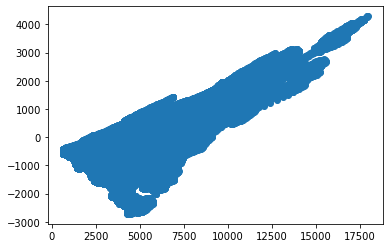

In [16]:
plt.scatter(svd2Data[:,0],svd2Data[:,1])

<AxesSubplot:>

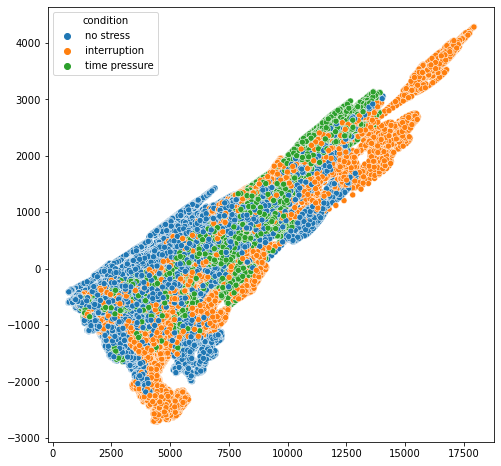

In [17]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x=svd2Data[:,0],
                y=svd2Data[:,1],
                ax=ax,
                data=pd.concat([labels, dfData], axis=1),
                hue='condition',
                )

# Developing HRV